## Libraries for the Project

In [43]:
#Required Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline

from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

from PIL import Image
import networkx as nx 
import pickle
import joblib

import warnings 
warnings.filterwarnings('ignore')

## Importing Dataset

In [44]:
#dataset 

dataset_path = "D:\\Academics\\Kavach\\Implementation\\Level 2\\malicious_url.csv"

malicious_data = pd.read_csv(dataset_path,encoding='latin1', error_bad_lines=False)
malicious_data.head()


,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [45]:
malicious_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [46]:
malicious_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [47]:
malicious_data.isnull().sum()

URL      0
Label    0
dtype: int64

In [48]:
## Data frame with classes counts
label_counts = pd.DataFrame(malicious_data.Label.value_counts())

<AxesSubplot:ylabel='Label'>

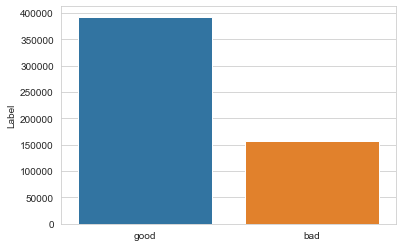

In [49]:
## Visualizing the target column
sns.set_style('whitegrid')
sns.barplot(label_counts.index,label_counts.Label)

## Preprocessing Data

In [50]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

### Tokenizing the words

In [51]:
malicious_data['text_tokenized'] = malicious_data.URL.map(lambda t: tokenizer.tokenize(t)) 

### Now words are getting stemmed

In [52]:
stemmer = SnowballStemmer("english")

In [53]:
malicious_data['text_stemmed'] = malicious_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

### Getting Joining Words

In [54]:
malicious_data['text_sent'] = malicious_data['text_stemmed'].map(lambda l: ' '.join(l))

### Sample Data after preprocessing 

In [55]:
malicious_data.sample(10)

,URL,Label,text_tokenized,text_stemmed,text_sent
62953,www.renesas.com/products/mpumcu/superh/superh_...,good,"[www, renesas, com, products, mpumcu, superh, ...","[www, renesa, com, product, mpumcu, superh, su...",www renesa com product mpumcu superh superh la...
181353,en.wikipedia.org/wiki/The_Stewart_Copeland_Ant...,good,"[en, wikipedia, org, wiki, The, Stewart, Copel...","[en, wikipedia, org, wiki, the, stewart, copel...",en wikipedia org wiki the stewart copeland ant...
453445,tvguide.com/celebrities/casey-stengel/226204,good,"[tvguide, com, celebrities, casey, stengel]","[tvguid, com, celebr, casey, stengel]",tvguid com celebr casey stengel
235072,rideact.blogspot.com/2009/10/gm-announces-sepa...,good,"[rideact, blogspot, com, gm, announces, separa...","[rideact, blogspot, com, gm, announc, separ, f...",rideact blogspot com gm announc separ from ac ...
524745,98.181.17.39/ase5.png,bad,"[ase, png]","[ase, png]",ase png
129264,tinywws.com/file/FLS/db/file.DRB/index.php,bad,"[tinywws, com, file, FLS, db, file, DRB, index...","[tinyww, com, file, fls, db, file, drb, index,...",tinyww com file fls db file drb index php
316393,dodgehousehotel.com/mural-history.html,good,"[dodgehousehotel, com, mural, history, html]","[dodgehousehotel, com, mural, histori, html]",dodgehousehotel com mural histori html
29482,pay-pai.help.sec.us-login-cgi.bin.resolution.c...,bad,"[pay, pai, help, sec, us, login, cgi, bin, res...","[pay, pai, help, sec, us, login, cgi, bin, res...",pay pai help sec us login cgi bin resolut cent...
88228,www.dummysoftware.com/imagegrabdummy.html,good,"[www, dummysoftware, com, imagegrabdummy, html]","[www, dummysoftwar, com, imagegrabdummi, html]",www dummysoftwar com imagegrabdummi html
331582,facebook.com/people/Elsie-Lefebvre/678181880,good,"[facebook, com, people, Elsie, Lefebvre]","[facebook, com, peopl, elsi, lefebvr]",facebook com peopl elsi lefebvr


## Creating Model

In [56]:
cv = CountVectorizer()

In [57]:
feature = cv.fit_transform(malicious_data.text_sent)

In [58]:
malicious_data.Label

0         bad
1         bad
2         bad
3         bad
4         bad
         ... 
549341    bad
549342    bad
549343    bad
549344    bad
549345    bad
Name: Label, Length: 549346, dtype: object

In [59]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
trainX, testX, trainY, testY = train_test_split(feature, malicious_data.Label)

## Creting Logistic Regression: Machine Learning Algorithm 



In [61]:
lr = LogisticRegression()
lr.fit(trainX,trainY)

LogisticRegression()

In [62]:
lr.score(testX,testY)

0.9639863984214013

In [63]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9782164952707344
Testing Accuracy : 0.9639863984214013

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.90      0.97      0.93     36499
        Good       0.99      0.96      0.98    100838

    accuracy                           0.96    137337
   macro avg       0.95      0.97      0.95    137337
weighted avg       0.97      0.96      0.96    137337


CONFUSION MATRIX


<AxesSubplot:>

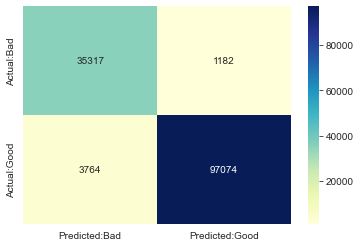

In [64]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")


## Multinomial Naive Bayes

In [65]:
mnb = MultinomialNB()
mnb.fit(trainX,trainY)

MultinomialNB()

In [66]:
mnb.score(testX,testY)

0.9578336500724495

In [67]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9741073617323893
Testing Accuracy : 0.9578336500724495

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.94      0.92     38058
        Good       0.98      0.97      0.97     99279

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<AxesSubplot:>

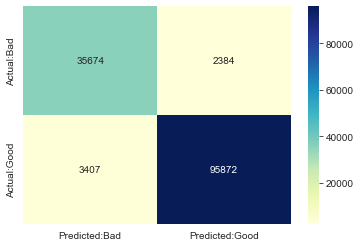

In [68]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")


<AxesSubplot:ylabel='Accuracy'>

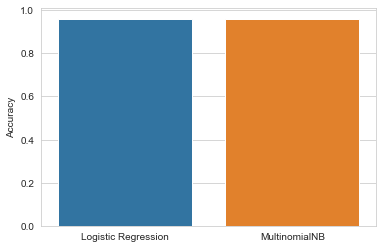

In [69]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('whitegrid')
sns.barplot(acc.index,acc.Accuracy)

### From above graph we understood Logistic Regression gives slightly more accuracy

In [70]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 

In [71]:
trainX, testX, trainY, testY = train_test_split(malicious_data.URL, malicious_data.Label)

In [72]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [73]:
pipeline_ls.score(testX,testY)

0.9651951040142133

Training Accuracy : 0.9788815292869816
Testing Accuracy : 0.9651951040142133

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36772
        Good       0.99      0.96      0.98    100565

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<AxesSubplot:>

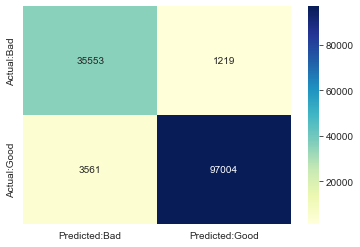

In [74]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

## Saving the model

In [75]:
pickle.dump(pipeline_ls,open('malicious.pkl','wb'))
joblib.dump(lr,'malicious1.pkl')

['malicious1.pkl']

## Loading the model

In [2]:
import pickle
loaded_model = pickle.load(open('malicious.pkl', 'rb'))

## Testing with sample data

In [4]:
predict1 = ['https://www.youtube.com','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict2 = ['http://testphp.vulnweb.com/login.php','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('malicious.pkl', 'rb'))

result1 = loaded_model.predict(predict1)
result2 = loaded_model.predict(predict2)

print(result1)
print("\n")
print(result2)

['good' 'bad' 'bad' 'bad']


['bad' 'good' 'good' 'good']
